# Descriptive (Spatial) Analytics

Analyze taxi demand patterns for the relevant one-year period and 
city (please check carefully which year your team has been allocated). 

Specifically show how these
patterns (start time, trip length, start and end location, price, average idle time between trips, and so 
on) for the given sample varies in different spatio-temporal resolution (i.e., census tract vs. varying
hexagon diameter and/or temporal bin sizes). 

Give possible reasons for the observed patterns.

Notes:

- Histogram for distribution
- trip length on census tract -> districts
- trip length on varying hexagon diamater
- trip length on tempotal bin sizes

Features: 
- for both trip minutes and trip miles

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import descriptive as desc

In [4]:
#import dataset
df = pd.read_csv("./data/datasets/df_chicago.csv.zip") ## df_chicago
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8974520 entries, 0 to 8974519
Data columns (total 44 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Trip_ID                        object 
 1   Taxi_ID                        object 
 2   Trip_Start_Timestamp           object 
 3   Trip_End_Timestamp             object 
 4   Trip_Seconds                   float64
 5   Trip_Miles                     float64
 6   Pickup_Census_Tract            float64
 7   Dropoff_Census_Tract           float64
 8   Pickup_Community_Area          float64
 9   Dropoff_Community_Area         float64
 10  Fare                           float64
 11  Tips                           float64
 12  Tolls                          float64
 13  Extras                         float64
 14  Payment_Type                   object 
 15  Pickup_Centroid_Latitude       float64
 16  Pickup_Centroid_Longitude      float64
 17  Pickup_Centroid_Location       object 
 18  Dr

## Trip length (minutes)

In [5]:
palette = "turbo"
def create_boxplot(x,y, data):
    sns.boxplot(x=x,y=y,data=data,palette=palette,hue="dayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    plt.title("Daily Fleet Usage Per Unique Hour & Weekday", fontsize=18)
    plt.xlabel("Starting Hour of Rental", fontsize=14, style='oblique')
    plt.ylabel("Number of rented bikes (per hour)", fontsize=14, style='oblique')
    plt.show()

#### Trip seconds

<Axes: xlabel='Trip_Minutes', ylabel='Count'>

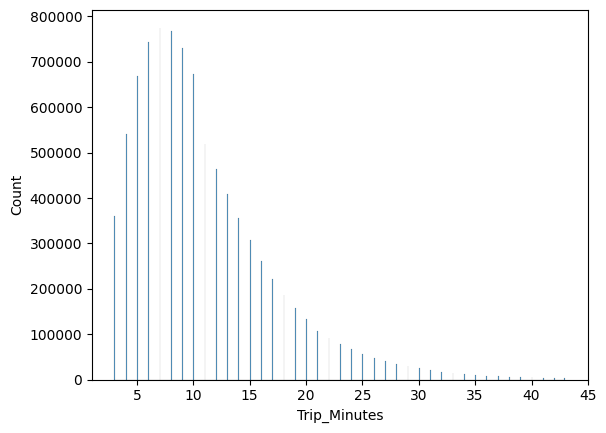

In [6]:
df["Trip_Minutes"] = np.floor(df["Trip_Seconds"] / 60)
sns.histplot(df["Trip_Minutes"])

In [7]:
#How many rides start per district
grouped = df[["Pickup_Census_Tract", "Trip_Minutes"]].groupby("Pickup_Census_Tract").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
Pickup_Census_Tract,
1.703128e+10,280532
1.703108e+10,363559
1.703108e+10,382655
1.703132e+10,485983
1.703184e+10,814316


In [8]:
#How many rides end per district
grouped = df[["Dropoff_Census_Tract", "Trip_Minutes"]].groupby("Dropoff_Census_Tract").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
Dropoff_Census_Tract,
1.703128e+10,283616
1.703108e+10,286083
1.703108e+10,309481
1.703132e+10,410732
1.703184e+10,741576


In [9]:
#How many minutes start per district
grouped = df[["Pickup_Census_Tract", "Trip_Minutes"]].groupby("Pickup_Census_Tract").sum().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Sum"})
grouped.tail()

,Sum
Pickup_Census_Tract,
1.703128e+10,2736640.0
1.703108e+10,3118761.0
1.703108e+10,3527478.0
1.703132e+10,4316242.0
1.703184e+10,7296215.0


In [10]:
#How many minutes end per district
grouped = df[["Dropoff_Census_Tract", "Trip_Minutes"]].groupby("Dropoff_Census_Tract").sum().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Sum"})
grouped.tail()

,Sum
Dropoff_Census_Tract,
1.703108e+10,2557554.0
1.703108e+10,2580645.0
1.703128e+10,2624710.0
1.703132e+10,3533035.0
1.703184e+10,6405596.0


In [11]:
#How many minutes start on average per district
grouped = df[["Pickup_Census_Tract", "Trip_Minutes"]].groupby("Pickup_Census_Tract").mean().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Average"})
grouped.tail()

,Average
Pickup_Census_Tract,
1.703156e+10,30.0
1.703171e+10,31.0
1.703144e+10,32.0
1.703110e+10,35.0
1.703121e+10,37.0


In [12]:
#How many minutes end on average per district
grouped = df[["Dropoff_Census_Tract", "Trip_Minutes"]].groupby("Dropoff_Census_Tract").mean().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Average"})
grouped.tail()

,Average
Dropoff_Census_Tract,
1.703173e+10,28.0
1.703162e+10,30.0
1.703102e+10,30.0
1.703125e+10,30.0
1.703125e+10,30.0


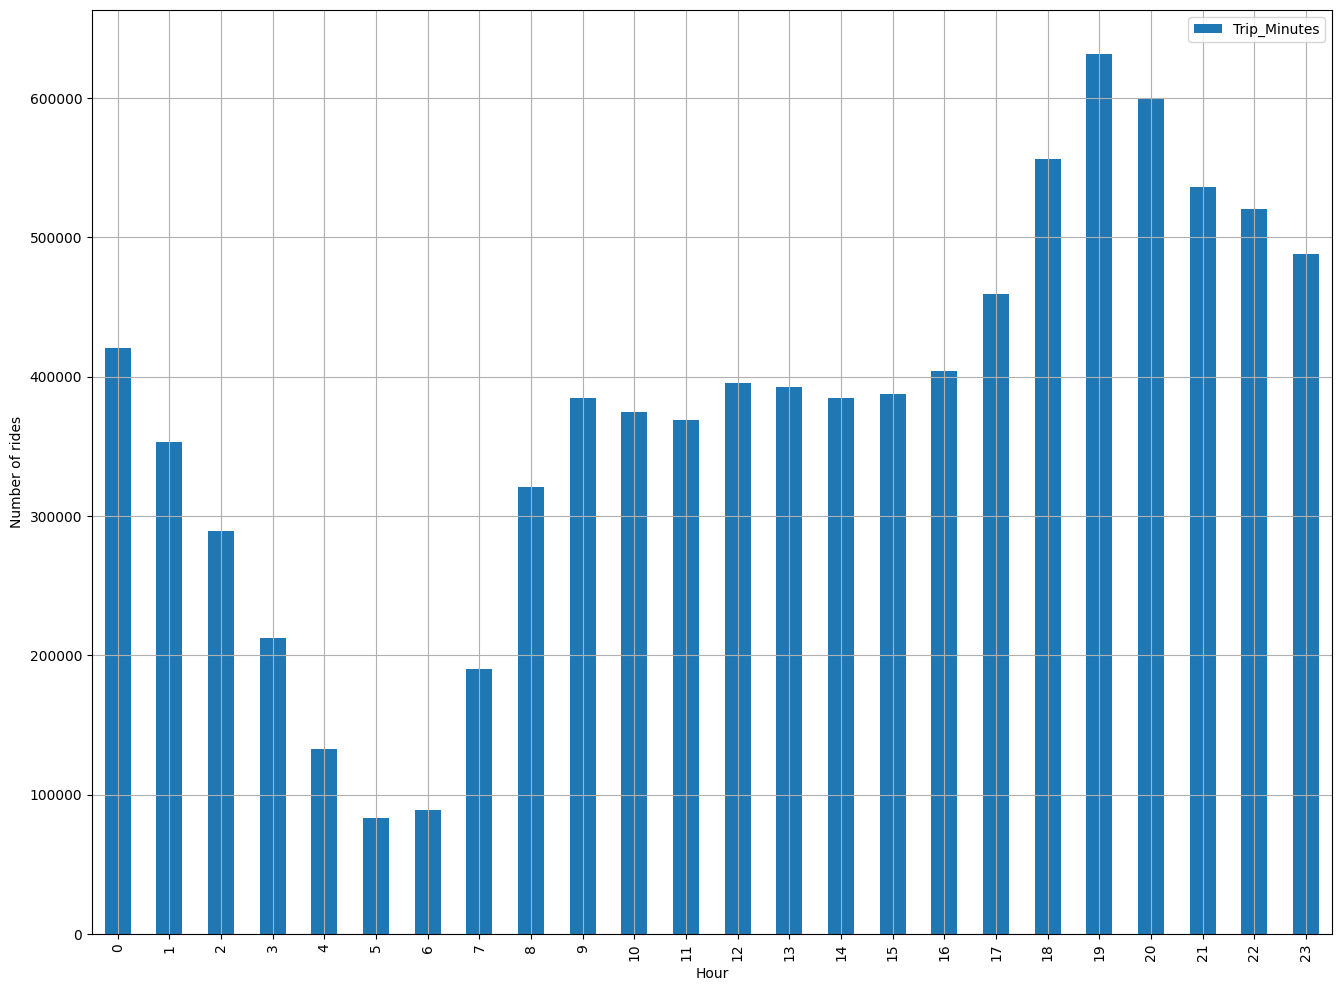

In [15]:
grouped_hours = df[["start_time_hourly", "Trip_Minutes"]].groupby("start_time_hourly").count()
grouped_hours.plot(kind='bar', ylabel='Number of rides', xlabel='hour', figsize=(16,12), alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of rides")
# plt.title("Average number of rides per hour")
# plt.legend(["Average number of rides"])
plt.show()

In [ ]:
#How many rides start per district
grouped = df[["Pickup_Census_Tract", "Trip_Miles"]].groupby("Pickup_Census_Tract").count().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Count"})
grouped.tail()

,Trip_Miles
Pickup_Census_Tract,
1.703128e+10,280527
1.703108e+10,363515
1.703108e+10,382609
1.703132e+10,485957
1.703184e+10,814282


In [ ]:
#How many rides end per district
grouped = df[["Dropoff_Census_Tract", "Trip_Miles"]].groupby("Dropoff_Census_Tract").count().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Count"})
grouped.tail()

,Trip_Miles
Dropoff_Census_Tract,
1.703128e+10,283609
1.703108e+10,286058
1.703108e+10,309451
1.703132e+10,410715
1.703184e+10,741563


In [ ]:
#How many minutes start per district
grouped = df[["Pickup_Census_Tract", "Trip_Miles"]].groupby("Pickup_Census_Tract").sum().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Sum"})
grouped.tail()

,Trip_Miles
Pickup_Census_Tract,
1.703198e+10,542587.71
1.703108e+10,589789.58
1.703108e+10,656860.28
1.703132e+10,836171.04
1.703184e+10,1323167.61


In [ ]:
#How many minutes end per district
grouped = df[["Dropoff_Census_Tract", "Trip_Miles"]].groupby("Dropoff_Census_Tract").sum().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Sum"})
grouped.tail()

,Trip_Miles
Dropoff_Census_Tract,
1.703108e+10,457166.13
1.703133e+10,472786.75
1.703198e+10,644929.81
1.703132e+10,651340.93
1.703184e+10,1090535.94


In [ ]:
#How many minutes start on average per district
grouped = df[["Pickup_Census_Tract", "Trip_Miles"]].groupby("Pickup_Census_Tract").mean().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Average"})
grouped.tail()

,Trip_Miles
Pickup_Census_Tract,
1.703119e+10,11.400000
1.703143e+10,11.433333
1.703145e+10,11.800000
1.703121e+10,12.300000
1.703102e+10,12.700000


In [ ]:
#How many minutes end on average per district
grouped = df[["Dropoff_Census_Tract", "Trip_Miles"]].groupby("Dropoff_Census_Tract").mean().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Average"})
grouped.tail()

,Trip_Miles
Dropoff_Census_Tract,
1.703140e+10,9.75
1.703125e+10,10.30
1.703158e+10,10.40
1.703164e+10,11.30
1.703177e+10,11.40


### Different Hexagon Resolutions

In [ ]:
#How many rides start per district
grouped = df[["h3_hex_id_low_res", "Trip_Miles"]].groupby("h3_hex_id_low_res").count().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Count"})
grouped.tail()

,Trip_Miles
h3_hex_id_low_res,
862664ca7ffffff,298214
862664d8fffffff,425809
862664cafffffff,765438
862664c17ffffff,1951115
862664c1fffffff,5220199


In [ ]:
#How many minutes start per district
grouped = df[["h3_hex_id_low_res", "Trip_Miles"]].groupby("h3_hex_id_low_res").sum().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Sum"})
grouped.tail()

,Trip_Miles
h3_hex_id_low_res,
862664ca7ffffff,841351.16
862664d8fffffff,1235793.03
862664cafffffff,1807736.78
862664c17ffffff,4355317.81
862664c1fffffff,10184633.47


In [ ]:
#How many minutes start on average per district
grouped = df[["h3_hex_id_low_res", "Trip_Miles"]].groupby("h3_hex_id_low_res").mean().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Average"})
grouped.tail()

,Trip_Miles
h3_hex_id_low_res,
86266452fffffff,4.573803
86266456fffffff,4.675000
862664d87ffffff,6.016000
862759347ffffff,7.327827
862664527ffffff,7.544964


In [ ]:
#How many rides start per district
grouped = df[["h3_hex_id_medium_res", "Trip_Miles"]].groupby("h3_hex_id_medium_res").count().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Count"})
grouped.tail()

,Trip_Miles
h3_hex_id_medium_res,
872664cacffffff,383544
872664c13ffffff,517422
872664c16ffffff,702683
872664c1affffff,1654640
872664c1effffff,3277479


In [ ]:
#How many minutes start per district
grouped = df[["h3_hex_id_medium_res", "Trip_Miles"]].groupby("h3_hex_id_medium_res").sum().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Sum"})
grouped.tail()

,Trip_Miles
h3_hex_id_medium_res,
872664cacffffff,877021.45
872664c13ffffff,1066992.94
872664c16ffffff,1776840.40
872664c1affffff,3321996.97
872664c1effffff,6264143.47


In [ ]:
#How many minutes start on average per district
grouped = df[["h3_hex_id_medium_res", "Trip_Miles"]].groupby("h3_hex_id_medium_res").mean().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Average"})
grouped.tail()

,Trip_Miles
h3_hex_id_medium_res,
872759343ffffff,7.782336
872664521ffffff,7.939956
872664c83ffffff,9.350000
872664c8bffffff,10.250000
872664cebffffff,11.433333


In [ ]:
#How many rides start per district
grouped = df[["h3_hex_id_high_res", "Trip_Miles"]].groupby("h3_hex_id_high_res").count().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Count"})
grouped.tail()

,Trip_Miles
h3_hex_id_high_res,
882664c163fffff,517108
882664c1e3fffff,726653
882664c1edfffff,749389
882664c1e1fffff,798286
882664c1a9fffff,1070522


In [ ]:
#How many minutes start per district
grouped = df[["h3_hex_id_high_res", "Trip_Miles"]].groupby("h3_hex_id_high_res").sum().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Sum"})
grouped.tail()

,Trip_Miles
h3_hex_id_high_res,
882664c1e3fffff,1264562.66
882664c163fffff,1290254.50
882664c1e1fffff,1357848.39
882664c1edfffff,1985703.86
882664c1a9fffff,2292197.85


In [ ]:
#How many minutes start on average per district
grouped = df[["h3_hex_id_high_res", "Trip_Miles"]].groupby("h3_hex_id_high_res").mean().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Average"})
grouped.tail()

,Trip_Miles
h3_hex_id_high_res,
882664cce1fffff,10.600000
88275936bbfffff,10.900000
882664ca25fffff,11.400000
882664ceb1fffff,11.433333
882664d8edfffff,12.700000


### Different time bins

In [ ]:
#How many minutes start on average per district
grouped = df[["dayOfWeek", "Trip_Minutes"]].groupby("dayOfWeek").mean().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Average"})
grouped.tail()

,Average
dayOfWeek,
Sunday,10.675342
Wednesday,10.752214
Thursday,10.869998
Saturday,10.978194
Friday,11.175963


#### Month bin size

<Axes: xlabel='start_time_month', ylabel='Count'>

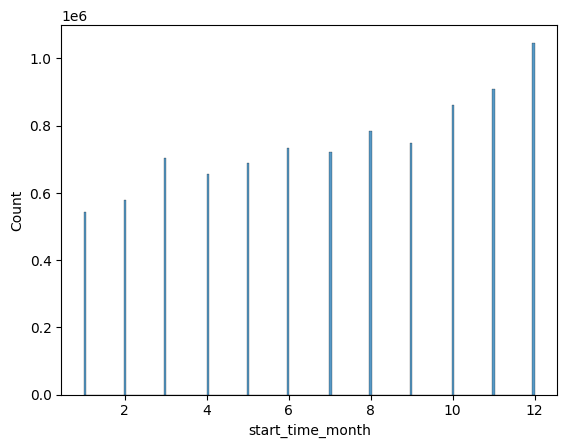

In [ ]:
sns.histplot(df["start_time_month"])

In [ ]:
#How many rides start per district
grouped = df[["start_time_month", "Trip_Minutes"]].groupby("start_time_month").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
start_time_month,
9,749200
8,782930
10,860663
11,908771
12,1046948


In [ ]:
#How many rides start per district
grouped = df[["start_time_month", "Trip_Minutes"]].groupby("start_time_month").sum().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Sum"})
grouped.tail()

,Sum
start_time_month,
9,8303900.0
8,8637599.0
10,9521845.0
11,9889261.0
12,11572220.0


In [ ]:
#How many rides start per district
grouped = df[["start_time_month", "Trip_Minutes"]].groupby("start_time_month").mean().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Average"})
grouped.tail()

,Average
start_time_month,
12,11.053290
10,11.063384
9,11.083689
6,11.141958
7,11.174886


Ab hier aber keine Info mehr über minutes 

In [ ]:
df_2h_bin = pd.read_csv("./data/datasets/df_2h_hexmed.csv")
df_2h_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162765 entries, 0 to 162764
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date_start            162765 non-null  object 
 1   start_stamp           162765 non-null  int64  
 2   h3_hex_id_medium_res  162765 non-null  object 
 3   numOfTaxis_area       162765 non-null  int64  
 4   start_time_hourly     162765 non-null  int64  
 5   dayOfWeek             162765 non-null  object 
 6   isHoliday             162765 non-null  bool   
 7   isRushhour            162765 non-null  bool   
 8   start_time_day        162765 non-null  int64  
 9   start_time_week       162765 non-null  int64  
 10  start_time_month      162765 non-null  int64  
 11  pressure              162765 non-null  float64
 12  humidity              162765 non-null  float64
 13  wind_direction        162765 non-null  float64
 14  wind_speed            162765 non-null  float64
 15  

In [ ]:
#How many rides start per district
grouped = df_2h_bin[["start_time_hourly", "date_start"]].groupby("start_time_hourly").count().sort_values(by="date_start")
grouped.tail()

,date_start
start_time_hourly,
12,12205
18,12230
10,12523
22,12559
20,12636


In [ ]:
#How many minutes start per district
grouped = df_2h_bin[["start_time_hourly", "Trip_Minutes"]].groupby("start_time_hourly").sum().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Sum"})
grouped.tail()

KeyError: "['Trip_Minutes'] not in index"

In [ ]:
#How many minutes start on average per district
grouped = df_2h_bin[["start_time_hourly", "Trip_Minutes"]].groupby("start_time_hourly").mean().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Average"})
grouped.tail()

,Trip_Minutes
start_time_hourly,
9,11.153113
16,11.411572
19,11.618563
17,12.028749
18,12.289184
